In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

### 2. 
Sea 𝑍 la variable aleatoria con distribución skew-normal de parámetro $\alpha = 10$. Consideremos
la función $f : R → R$ dada por $f(x) =2x −1$. Sean 𝑋 ∼U(0,1)y 𝑌  = 𝑓 (𝑋)+𝑍

#### a) 
Fijemos 𝑛 =100. Tomar muestras 𝑥1, . . .,𝑥𝑛de 𝑋 y 𝑧1, . . .,𝑧𝑛de 𝑍 y calcular 𝑦𝑖=𝑓 (𝑥𝑖)+𝑧𝑖,
con 1 ≤𝑖 ≤𝑛. Realizar un ajuste lineal de la forma 𝑌 =𝑋𝛽1 +𝛽0 +𝜖 a partir de los samples
(𝑥1,𝑦1), . . ., (𝑥𝑛,𝑦𝑛)generados

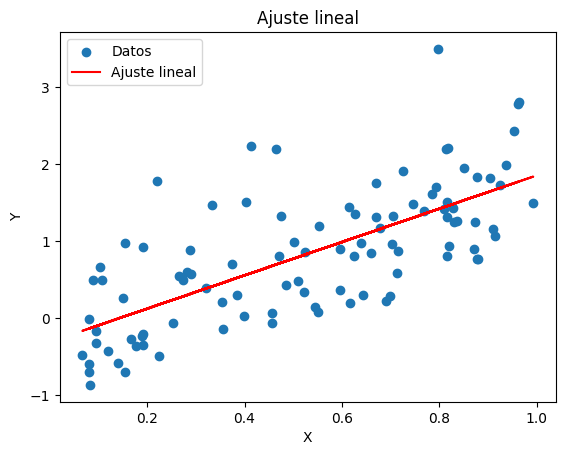

In [67]:
n = 100

def f(x):
    return 2*x - 1

Z = st.skewnorm.rvs(10, size=n)

X = np.random.uniform(0, 1, size=n)

Y = f(X) + Z
Y = Y.reshape(-1,1)

# Voy a usar cuadrados minimos
X_intercept = np.vstack([X, np.ones_like(X)]).T
beta = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y

predictions = X_intercept @ beta

plt.scatter(X, Y, label='Datos')
plt.plot(X, predictions, color='red', label='Ajuste lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste lineal')
plt.legend()
plt.show()

#### b)
Repetir el paso anterior 𝑚 =30 veces para obtener 𝑚 pares de coeficientes $\beta_0$ y $\beta_1$, es decir, 𝑚
samples de $\hat{\beta_0}$ y 𝑚 samples de $\hat{\beta_1}$. ¿Diríamos que estas distribuciones empíricas son normales?
Hacer histogramas para comprobarlo.

In [68]:
m = 30
betas_0 = np.zeros(30)
betas_1 = np.zeros(30)

for i in range(30):
    def f(x):
        return 2*x - 1
    Z = st.skewnorm.rvs(10, size=n)

    X = np.random.uniform(0, 1, size=n)

    Y = f(X) + Z
    Y = Y.reshape(-1,1)

    X_intercept = np.vstack([X, np.ones_like(X)]).T
    beta = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y
    betas_0[i] = beta[1][0]
    betas_1[i] = beta[0][0]


(array([2., 0., 3., 2., 6., 5., 0., 5., 3., 4.]),
 array([-0.47382597, -0.42731383, -0.3808017 , -0.33428956, -0.28777742,
        -0.24126529, -0.19475315, -0.14824101, -0.10172888, -0.05521674,
        -0.0087046 ]),
 <BarContainer object of 10 artists>)

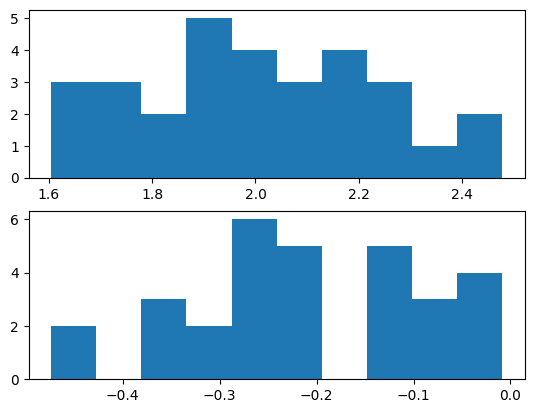

In [69]:
fig, axs = plt.subplots(2, 1)
axs[0].hist(betas_1)
axs[1].hist(betas_0)

No parecen seguir una distribución normal

### 3.
Modelemos la cantidad de likes diarios que recibe un posteo en Instagram los 30 días posteriores
a su publicación. Para eso, consideramos muestras (𝑥1,𝑦1), . . ., (𝑥𝑛,𝑦𝑛) de las variables aleatorias
𝑋, los días desde el posteo, que toma valores entre 0 y 30, y 𝑌, la cantidad de likes por día, que
es un proceso de Poisson que debe reflejar de manera razonable el fenómeno (por ejemplo, los
primeros días se dan muchos likes y después van decayendo en el tiempo).

#### a)
generamos x e y para n =100 y graficar

Text(0, 0.5, 'Likes por dia')

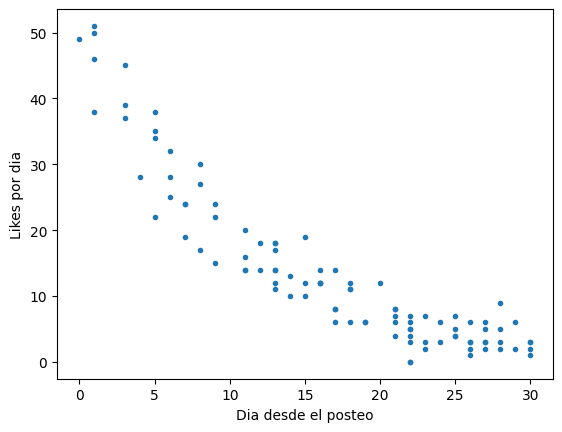

In [71]:
dias_desde_posteo = np.arange(0, 31)

tasa_likes = 50 * np.exp(-0.1 * dias_desde_posteo) # Tasa decreciente exponencial

X = np.random.choice(dias_desde_posteo, size=n)
Y = np.random.poisson(tasa_likes[X], size=n)

plt.plot(X, Y, ".")
plt.xlabel("Dia desde el posteo")
plt.ylabel("Likes por dia")


#### b)
 Proponer el Modelo Lineal Generalizado de Poisson y encontrar estimaciones puntuales para
los parámetros de regresión 𝛽

In [72]:
X_intercept = np.column_stack([np.ones_like(X), X])

$y = Poisson(\mu)$  
$g(\mu) = \log(\mu) = \beta_0 + \beta_1 x$

$L(y,\mu) = \prod_{i=1}^{n} \frac{1}{y!}e^{y\log\mu - \mu}$  

$l(y,\mu) = \sum_{i=1}^{n} y\log\mu - \mu$

In [73]:
from scipy.optimize import minimize

def neg_log_likelihood(beta, X, Y):
    mu = np.exp(X @ beta)
    return - np.sum(Y*np.log(mu) - mu)

result = minimize(neg_log_likelihood, [0,0], args= (X_intercept,Y))

In [74]:
beta_0, beta_1 = result.x

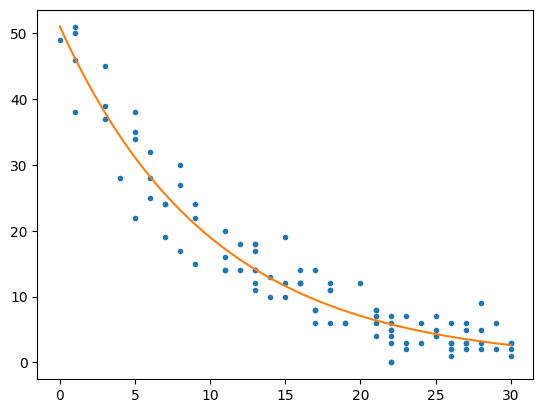

In [75]:
linspace = np.linspace(0,30, 1000)
mu_pred = np.exp(beta_0 + beta_1 * linspace)

plt.plot(X, Y, ".")
plt.plot(linspace, mu_pred)

#### c)
 Determinar el error estándar de cada parámetro de regresión

In [76]:
mu = np.exp(X_intercept @ result.x)
W = np.diag(mu)

fisher = X_intercept.T @ W @ X_intercept #phi = 1

In [82]:
cov = np.linalg.inv(fisher)
se = np.sqrt(np.diag(cov))
print(f"Errores estandar de los betas: {se}")

Errores estandar de los betas: [0.04369521 0.00349401]


### 4.
 En 1000 tiradas de moneda aparecen 540 caras y 460 cecas. Estamos interesados en testear la
hipótesis 𝐻0: es igual o más probable sacar ceca que cara

#### b)

In [87]:
from scipy.stats import norm

n = 1000
p = 0.5

p_obs = 460/n

Z = (p_obs - p) / (np.sqrt((p*(1-p))/n)) # estadistico Z ~ N(0,1) (aprox)

alpha = 0.05

Z_critico = norm.ppf(1 - alpha)

print(f"Región de rechazo: (-inf, {Z_critico})")

print(f"Z_observado: {Z}")


Región de rechazo: (-inf, 1.6448536269514722)
Z_observado: -2.529822128134702


El $Z_{obs}$ cae en la región de rechazo, entonces rechazamos la $H_0$